# Practical Task

In [2]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import chain
from nltk import NaiveBayesClassifier

In [3]:
data = pd.read_csv("book_reviews_sample.csv")
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       100 non-null    int64 
 1   reviewText  100 non-null    object
 2   rating      100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [5]:
data['reviewText'][0]


'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

## Clean data


In [6]:
# lowercase
data['reviewText_clean'] = data['reviewText'].str.lower()

In [7]:
data.head()


,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny. a bit busy with all the diffe...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate. wha...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story. i read i...
3,10342,"Action, action, action! Equipment keeps gettin...",4,"action, action, action! equipment keeps gettin..."
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


### Rule-based sentiment with VADER


In [8]:
vader_sentiment = SentimentIntensityAnalyzer()


In [9]:
data['vader_sentiment_score'] = data['reviewText_clean'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])


In [10]:
# create labels
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)

<Axes: xlabel='vader_sentiment_label'>

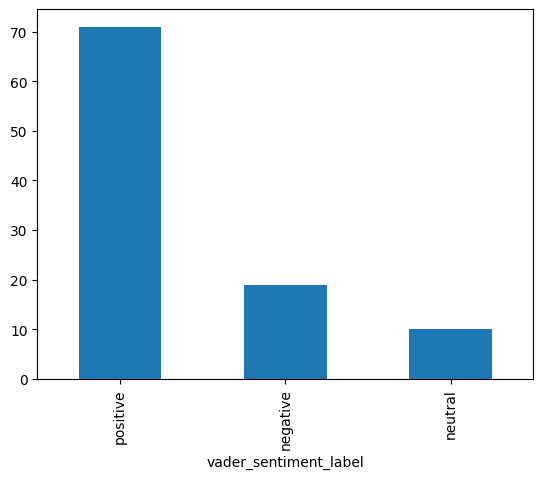

In [11]:
data['vader_sentiment_label'].value_counts().plot.bar()


### Pre-trained Transformer Model


In [13]:
transformer_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [14]:
transformer_labels = []

for review in data['reviewText_clean'].values:
    sentiment_list = transformer_pipeline(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)
    
data['transformer_sentiment_label'] = transformer_labels

<Axes: xlabel='transformer_sentiment_label'>

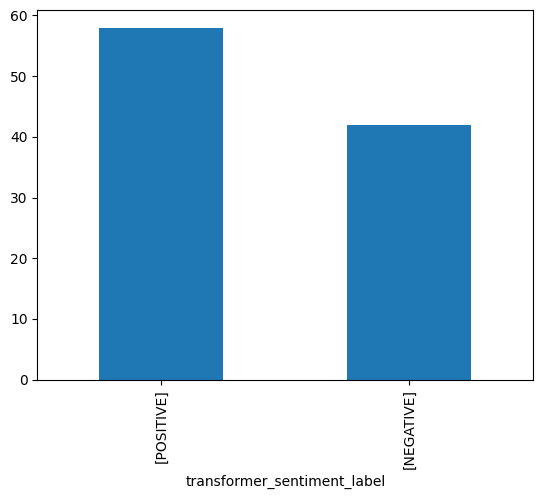

In [15]:
data['transformer_sentiment_label'].value_counts().plot.bar()
